# Intro To Linear Regression

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("Salary-Data.csv")
df.head(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [6]:
df.describe(include="object")

,Gender,Education Level,Job Title
count,373,373,373
unique,2,3,174
top,Male,Bachelor's,Director of Marketing
freq,194,224,12


In [7]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [8]:
df.isna()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
370,False,False,False,False,False,False
371,False,False,False,False,False,False
372,False,False,False,False,False,False
373,False,False,False,False,False,False


In [9]:
df.isna().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

<Axes: >

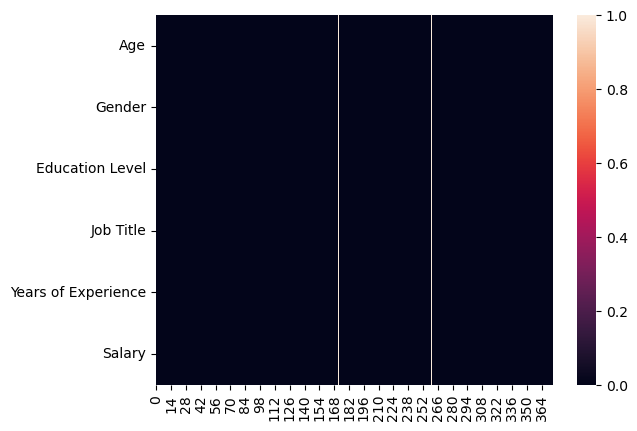

In [10]:
import seaborn as sns
sns.heatmap(df.isna().transpose())

In [11]:
df.loc[df.isna().any(axis="columns")]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.dropna(inplace=True)
df.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [13]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


# Feature Selection

In [14]:
df.corr(numeric_only=True)

,Age,Years of Experience,Salary
Age,1.000000,0.979128,0.922335
Years of Experience,0.979128,1.000000,0.930338
Salary,0.922335,0.930338,1.000000


<Axes: >

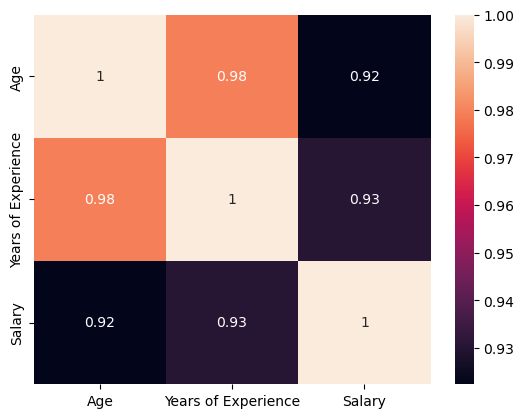

In [15]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

* Age is positively correlated with salary . aGE increase value of salary also increase
* Years of experience is also correlated with salary.



Which means we can use both years and yoe as independent variable to predict salary. However the years of experience is also correlated with age. This is a problem of multi colinarity. If independent var. are correlated it is called multi colinearity . In sucha pair we have to draw one independent variable.


At the inference time years of experience is readily available. Age is difficult to know/ ask to people. So we use years of experience as an independent variable. Other reason would be more correlated with salary.

In [16]:
X = df.loc[:, ["Years of Experience"]]  # X is always a 2D array
y = df.Salary # Y is always a 1D array

In [17]:
X.shape

(373, 1)

In [18]:
y.shape

(373,)

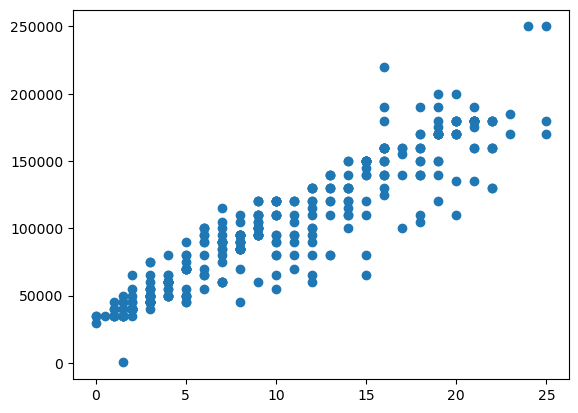

In [19]:
import matplotlib.pyplot as plt
plt.scatter(x=X, y=y)

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test.


<img src="https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/4_train-test-split.jpg">

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
model = LinearRegression()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
#  model training
model.fit(X_train, y_train)

LinearRegression()

# Evaluation

In [25]:
model.predict([[7]])

c:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([79279.20884513])

In [26]:
m = model.coef_
c = model.intercept_

In [27]:
m

array([6822.59017499])

In [28]:
c

31521.077620206008

In [29]:
y_pred = model.predict(X_test)
y_pred

array([174795.47129497,  99746.97937009, 140682.52042002,  72456.61867014,
       147505.11059501, 154327.70077   , 181618.06146996,  99746.97937009,
        51988.84814517,  92924.3891951 , 120214.74989506, 174795.47129497,
        45166.25797018,  92924.3891951 , 127037.34007005,  51988.84814517,
        65634.02849515,  41754.96288269,  79279.20884513,  86101.79902012,
        99746.97937009,  92924.3891951 , 140682.52042002,  65634.02849515,
        72456.61867014,  58811.43832016, 154327.70077   ,  45166.25797018,
       120214.74989506, 161150.29094499,  51988.84814517, 127037.34007005,
        51988.84814517, 133859.93024504,  99746.97937009,  34932.3727077 ,
       174795.47129497,  45166.25797018, 154327.70077   ,  58811.43832016,
        45166.25797018,  92924.3891951 , 202085.83199492, 161150.29094499,
        45166.25797018, 140682.52042002, 106569.56954508,  45166.25797018,
        45166.25797018,  45166.25797018, 161150.29094499,  86101.79902012,
       120214.74989506, 1

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
mean_squared_error(y_test, y_pred)

241834883.8999349

In [32]:
from sklearn.metrics import mean_absolute_error

In [33]:
mean_absolute_error(y_test, y_pred)

12094.170341194764

In [34]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8991338517367767

# Multiple Linear regeression'

Done by T test byt here done by box plot

Does the Education level affect the salary?

<Axes: xlabel='Education Level', ylabel='Salary'>

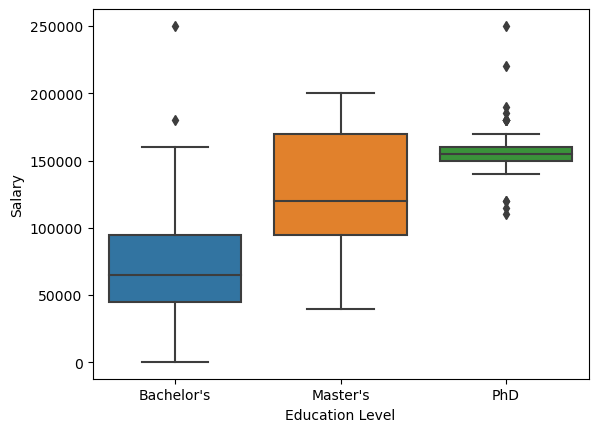

In [35]:
sns.boxplot(x='Education Level', y='Salary', data=df)

##### The median salary of Education Level: PdD > Masters > Bachelors

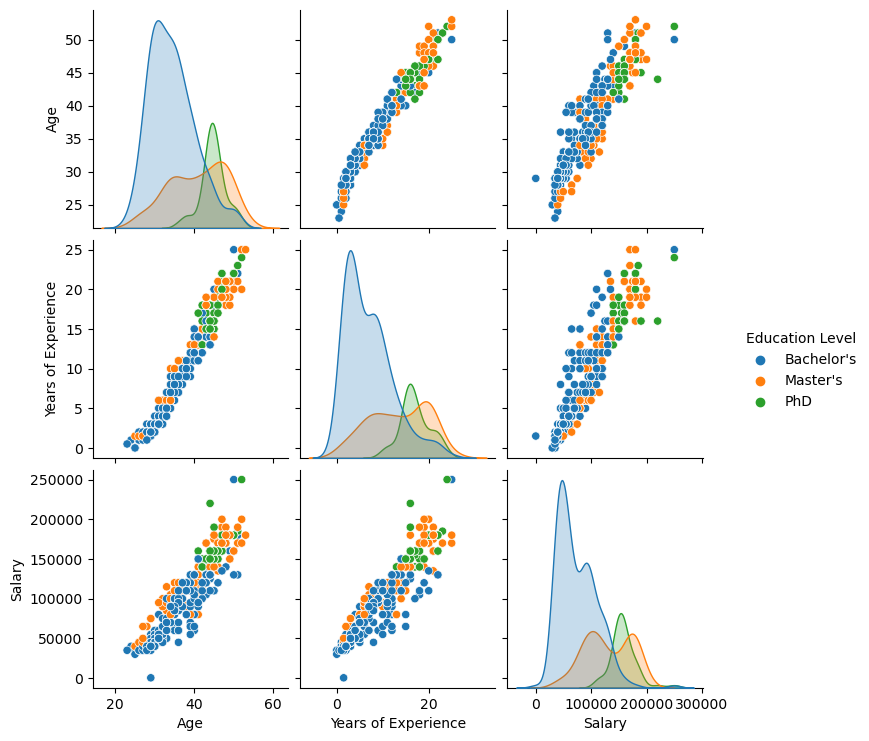

In [36]:
sns.pairplot(df, hue="Education Level")

In [37]:
X = df.loc[:, ["Years of Experience", "Education Level"]]

In [38]:
Y = df.Salary

In [39]:
X.head(5)

,Years of Experience,Education Level
0,5.0,Bachelor's
1,3.0,Master's
2,15.0,PhD
3,7.0,Bachelor's
4,20.0,Master's


# Feature Engineering
Converting categorial data to Numerical 

Techniques 
* OneHotEncoder
* LabelEncoder
* OrdinalEncoder
* FrequencyEncoder
* CountEncoder

In [40]:
from sklearn.preprocessing import  LabelEncoder
encoder=LabelEncoder()
X['Education']=encoder.fit_transform(X['Education Level'])


In [41]:
X.head()

,Years of Experience,Education Level,Education
0,5.0,Bachelor's,0
1,3.0,Master's,1
2,15.0,PhD,2
3,7.0,Bachelor's,0
4,20.0,Master's,1


In [42]:
X.drop(columns=["Education Level"] ,inplace=True)
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,Y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=42)

In [44]:
model=LinearRegression()

In [45]:
model.fit(X_train,y_train)

LinearRegression()

In [46]:
#eval
y_pred=model.predict(X_test)
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [47]:
mean_squared_error(y_test,y_pred)

234007303.3807584

In [48]:
mean_absolute_error(y_test,y_pred)

11104.79425163584

In [49]:
r2_score(y_test,y_pred)

0.9023986325841762

In [50]:
model.predict([(10,1)])

c:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([106496.74925067])

linear regression cannot be used in classification as the line goes from -inf to +inf and the probability is only from 0 to 1.
meanwhile for classification , sigmoid function is used and the algorithm is known as logistic Regression.

In [52]:
import pandas as pd
ds=pd.read_csv("train.csv")
ds.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
ds.shape

(891, 12)

In [55]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [57]:
ds.isna().sum()/len(ds)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

# age has 20% missing data
# cabin has 77% missing data
# embarked has 0.2% missing data

Exploratory data analysis(EDA)

In [58]:
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


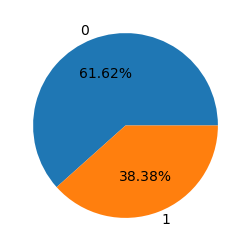

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
plt.pie(labels=ds.Survived.value_counts().index,x=ds.Survived.value_counts().values,autopct='%.2f%%')
plt.show()

In [72]:
x=ds.Survived.value_counts().index
x

Int64Index([0, 1], dtype='int64')

The pie chart shows:
* 61% data on 0 class and
* 38% data on 1 class
which means data is imblanaced.

If data is imbalanced we use Oversampling or Undersampling technique to balance the data.



<Axes: xlabel='Pclass', ylabel='count'>

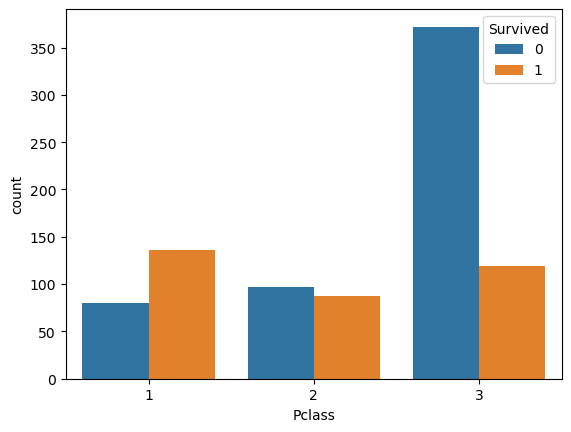

In [73]:
import seaborn as sns
sns.countplot(x='Pclass', hue='Survived' , data=ds)

# most people died in pclass 3
# most people survived in pclass 1
# pclass affects survived

<Axes: xlabel='Sex', ylabel='count'>

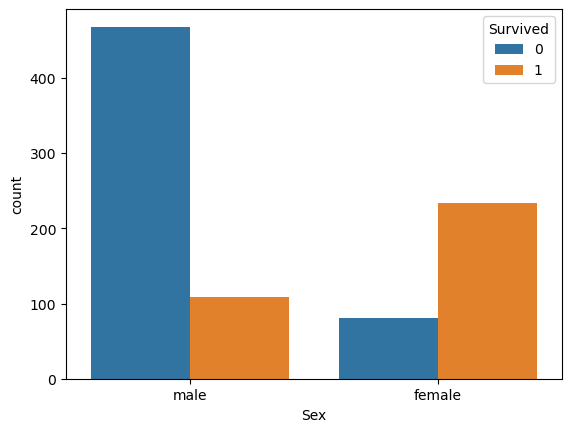

In [75]:
sns.countplot(x='Sex', hue='Survived' , data=ds)

In [76]:
# most of the men died
# most female survived
# it means sexx affects survived

In [77]:
# for continious data we use boxplot like age

<Axes: xlabel='Pclass', ylabel='Age'>

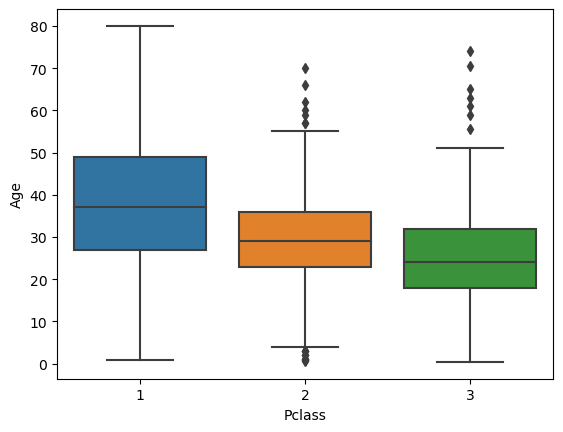

In [78]:
sns.boxplot(x='Pclass' ,y='Age', data=ds)

In [83]:
df=ds.groupby(['Pclass']).Age.median()
df

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [91]:
def fill_age(cols):
    age=cols[0]
    pclass=cols[1]
    if pd.isna(age) and pclass==1:
        return 37
    elif pd.isna(age) and pclass==2:
        return 29
    elif pd.isna(age) and pclass==3:
        return 24
    else:
        return age

In [93]:
ds.Age=ds[['Age' , 'Pclass']].apply(fill_age , axis='columns')

In [94]:
ds.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [95]:
# drop Cabin column
del ds['Cabin'] #drops the cabin column since there is 77% missing data.

In [97]:
ds.dropna(inplace=True)

In [98]:
ds.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [100]:
ds.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [101]:
# PassengerId , Name, Ticket makes no contribution to Survived column .It is an irrelevant feature. we drop such column

In [102]:
ds.drop(columns=['PassengerId' , 'Name' ,'Ticket'], inplace=True)

In [103]:
ds.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [105]:
x=ds.iloc[:, 1:]
y=ds.Survived

In [107]:
x.head(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.25,S


In [124]:
x_encoded=pd.get_dummies(columns=['Sex', 'Embarked'] , data=ds , drop_first=True)

In [125]:
x_encoded.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1


In [115]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,y_test=train_test_split(x_encoded,y,test_size=0.2, random_state=42)

In [129]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=5000)
model.fit(X_train , Y_train)
y_pred=model.predict(X_test)

In [131]:
# Evaluation

In [133]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_score , recall_score , f1_score

In [134]:
confusion_matrix(y_test, y_pred)

array([[109,   0],
       [  0,  69]], dtype=int64)

In [ ]:
ConfusionMatrixDisplay.from_estimator(model, Xt)